In [1]:
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
warnings.filterwarnings('ignore',category=DeprecationWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
import calendar

In [3]:
data = pd.read_excel("~/datasets/Dataset.xlsx", sheet_name=['Weather', 'Total Consumers'])
df_tc = data['Total Consumers']
df_w = data['Weather']
df_tc

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,2.964,2.322959,1.544607,0.778310,1.962012,2.677445,0.237877,0.689194,0.358525,0.814643,...,0.898895,0.203825,0.221624,0.319531,0.830996,0.924987,0.219128,0.274880,0.990488,0.779475
1,2.584,2.371797,1.544607,0.778310,1.962012,2.733737,0.192929,0.558967,0.358525,0.660712,...,0.917793,0.165311,0.179747,0.319531,0.848467,0.944434,0.177722,0.222940,1.011313,0.795863
2,3.071,2.415961,1.319880,0.665072,1.676555,2.784640,0.382869,1.109272,0.377198,1.311186,...,0.934883,0.328060,0.356708,0.336174,0.864266,0.962019,0.352691,0.442426,1.030144,0.810682
3,2.694,2.302538,1.319880,0.665072,1.676555,2.653908,0.442052,1.280743,0.377198,1.513868,...,0.890992,0.378772,0.411848,0.336174,0.823691,0.916855,0.407209,0.510816,0.981781,0.772623
4,2.569,2.363063,0.913154,0.460128,1.159919,2.723669,0.192242,0.556976,0.668500,0.658358,...,0.914413,0.164722,0.179106,0.595793,0.845343,0.940956,0.177089,0.222146,1.007588,0.792932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35131,1.664,2.244719,1.455982,0.733653,1.849437,2.587266,0.205654,0.595835,0.171793,0.704291,...,0.868619,0.176214,0.191602,0.153109,0.803007,0.893832,0.189444,0.237645,0.957128,0.753222
35132,1.659,2.136340,1.201186,0.605264,1.525786,2.462348,0.201219,0.582985,0.067223,0.689101,...,0.826680,0.172414,0.187470,0.059912,0.764237,0.850676,0.185359,0.232519,0.910916,0.716855
35133,1.664,2.192805,1.201186,0.605264,1.525786,2.527430,0.228585,0.662271,0.067223,0.782819,...,0.848530,0.195862,0.212966,0.059912,0.784436,0.873160,0.210568,0.264142,0.934992,0.735802
35134,1.697,1.446083,0.259545,0.130782,0.329682,1.666757,0.189302,0.548459,0.070958,0.648292,...,0.559578,0.162203,0.176368,0.063241,0.517310,0.575820,0.174381,0.218749,0.616596,0.485237


In [3]:
our_data = pd.read_csv("data/shared_all_records.csv")
our_data.dropna(inplace=True)
our_data.reset_index(drop=True, inplace=True)
our_data

,Time,Energy,Location
0,2020-10-06 00:15:00,0.076,PT41CV
1,2020-10-06 00:30:00,0.072,PT41CV
2,2020-10-06 00:45:00,0.072,PT41CV
3,2020-10-06 01:00:00,0.068,PT41CV
4,2020-10-06 01:15:00,0.032,PT41CV
...,...,...,...
576694,2022-11-25 00:00:00,0.764,PT87ZW
576695,2022-11-25 00:15:00,0.660,PT87ZW
576696,2022-11-25 00:30:00,0.692,PT87ZW
576697,2022-11-25 00:45:00,0.660,PT87ZW


In [4]:
our_total = pd.DataFrame(our_data.sum(axis=1))
our_total.columns = ['Energy']
our_total

,Energy
0,0.076
1,0.072
2,0.072
3,0.068
4,0.032
...,...
576694,0.764
576695,0.660
576696,0.692
576697,0.660


In [5]:
df_w

,datetime,TemperatureC,DewpointC,PressurehPa,WindSpeedKMH,WindSpeedGustKMH,Humidity,HourlyPrecipMM,dailyrainMM,SolarRadiationWatts_m2
0,2019-01-01 00:15:00.000,8,4,1030,5,7,76,0,0,0
1,2019-01-01 00:30:00.000,8,4,1030,3,6,76,0,0,0
2,2019-01-01 00:45:00.000,8,4,1030,4,6,78,0,0,0
3,2019-01-01 01:00:00.000,8,4,1030,3,6,78,0,0,0
4,2019-01-01 01:15:00.000,8,4,1030,2,8,78,0,0,0
...,...,...,...,...,...,...,...,...,...,...
35034,NaN,0,0,0,0,0,0,0,0,0
35035,NaN,0,0,0,0,0,0,0,0,0
35036,NaN,0,0,0,0,0,0,0,0,0
35037,NaN,0,0,0,0,0,0,0,0,0


In [6]:
df_merge = pd.concat([df_w,df_tc[0].rename("Energy")], axis=1)
df_merged = df_merge.dropna(axis=0).reset_index(drop=True)
df_merged['datetime'] = pd.to_datetime(df_merged['datetime']) 
df_merged

,datetime,TemperatureC,DewpointC,PressurehPa,WindSpeedKMH,WindSpeedGustKMH,Humidity,HourlyPrecipMM,dailyrainMM,SolarRadiationWatts_m2,Energy
0,2019-01-01 00:15:00,8.0,4.0,1030.0,5.0,7.0,76.0,0.0,0.0,0.0,2.964
1,2019-01-01 00:30:00,8.0,4.0,1030.0,3.0,6.0,76.0,0.0,0.0,0.0,2.584
2,2019-01-01 00:45:00,8.0,4.0,1030.0,4.0,6.0,78.0,0.0,0.0,0.0,3.071
3,2019-01-01 01:00:00,8.0,4.0,1030.0,3.0,6.0,78.0,0.0,0.0,0.0,2.694
4,2019-01-01 01:15:00,8.0,4.0,1030.0,2.0,8.0,78.0,0.0,0.0,0.0,2.569
...,...,...,...,...,...,...,...,...,...,...,...
12081,2019-05-17 23:00:00,12.0,8.0,1017.0,11.0,19.0,76.0,0.0,0.0,0.0,2.821
12082,2019-05-17 23:15:00,12.0,8.0,1016.0,11.0,17.0,76.0,0.0,0.0,0.0,3.031
12083,2019-05-17 23:30:00,12.0,8.0,1016.0,4.0,12.0,76.0,0.0,0.0,0.0,2.279
12084,2019-05-17 23:45:00,12.0,8.0,1016.0,3.0,14.0,76.0,0.0,0.0,0.0,2.580


In [7]:
df_total = pd.DataFrame(df_tc.sum(axis=1))
df_total.columns = ['Energy']
df_total = df_total[:df_merged.shape[0]]
df_total

,Energy
0,58.514142
1,57.575249
2,63.011688
3,62.735722
4,63.404029
...,...
12081,27.351455
12082,23.865841
12083,23.365855
12084,33.772043


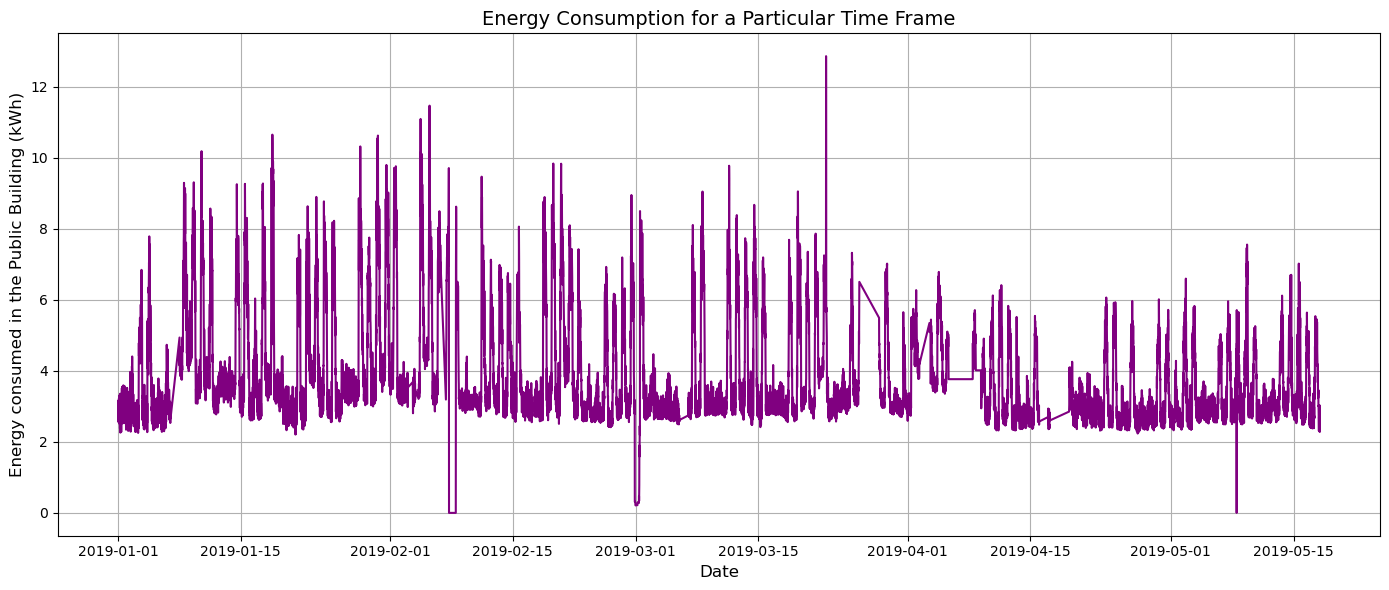

In [8]:
plt.figure(figsize=(14,6))
plt.plot(df_merged["datetime"], df_merged["Energy"], color='purple')
plt.ylabel('Energy consumed in the Public Building (kWh)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.title('Energy Consumption for a Particular Time Frame', fontsize=14)
plt.tight_layout()
plt.grid(True)
plt.show()

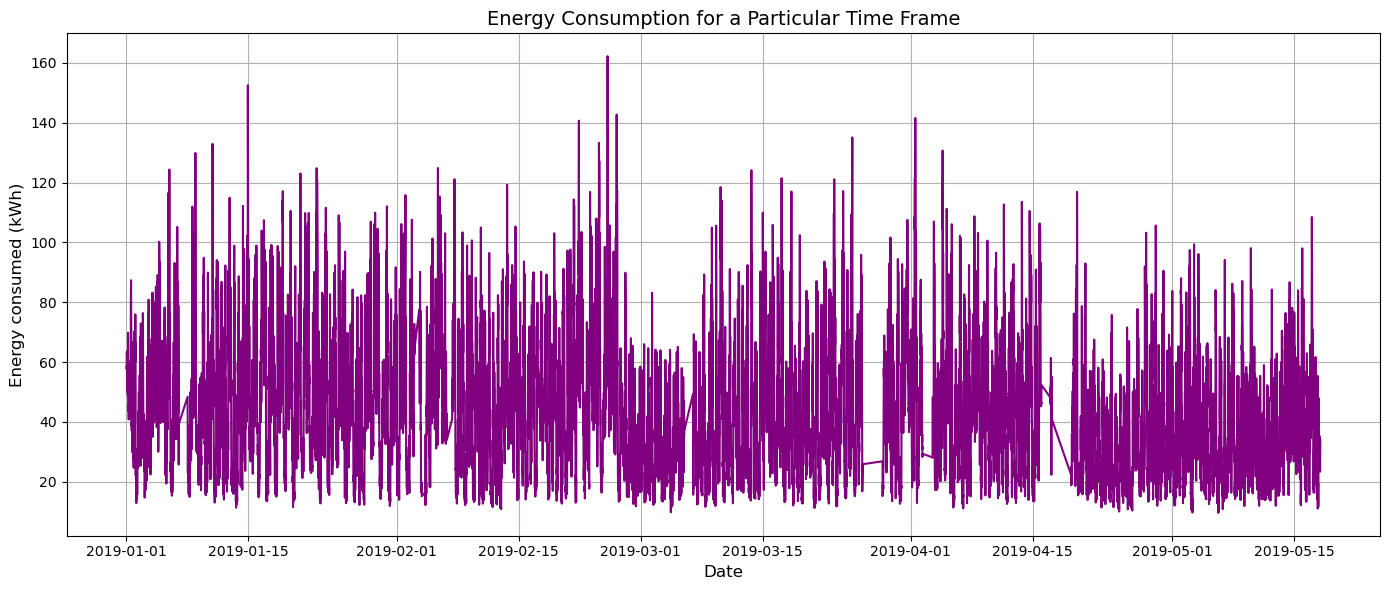

In [9]:
plt.figure(figsize=(14,6))
plt.plot(df_merged["datetime"], df_total, color='purple')
plt.ylabel('Energy consumed (kWh)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.title('Energy Consumption for a Particular Time Frame', fontsize=14)
plt.tight_layout()
plt.grid(True)
plt.show()

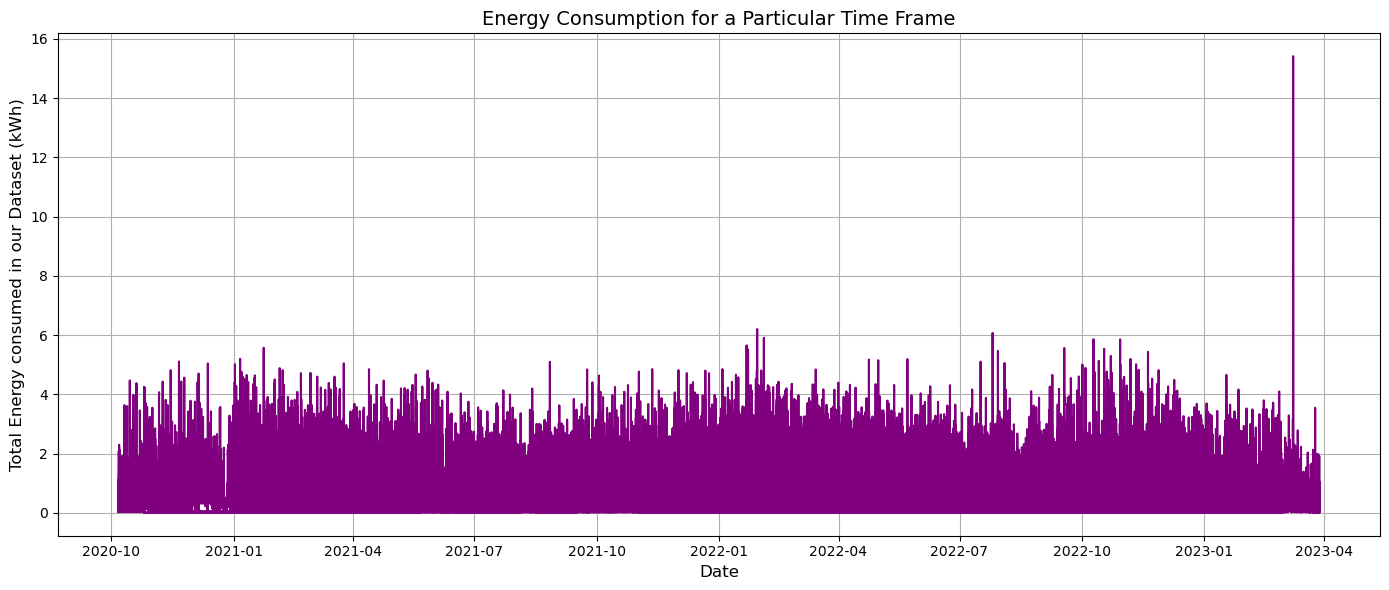

In [10]:
plt.figure(figsize=(14,6))
plt.plot(pd.to_datetime(our_data['Time']), our_total, color='purple')
plt.ylabel('Total Energy consumed in our Dataset (kWh)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.title('Energy Consumption for a Particular Time Frame', fontsize=14)
plt.tight_layout()
plt.grid(True)
plt.show()

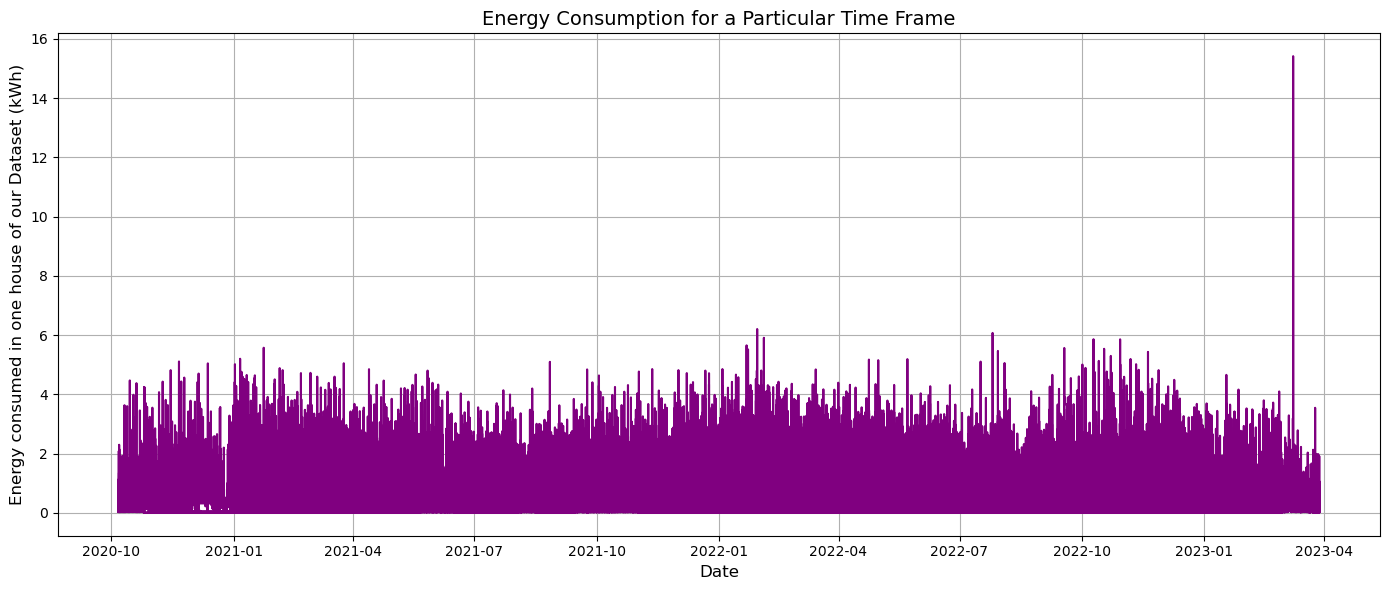

In [12]:
plt.figure(figsize=(14,6))
plt.plot(pd.to_datetime(our_data['Time']), our_data['Energy'].iloc[:35], color='purple')
plt.ylabel('Energy consumed in one house of our Dataset (kWh)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.title('Energy Consumption for a Particular Time Frame', fontsize=14)
plt.tight_layout()
plt.grid(True)
plt.show()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

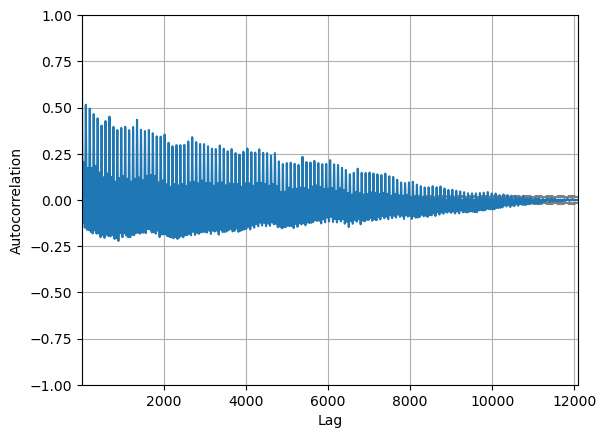

In [15]:
autocorrelation_plot(df_total)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

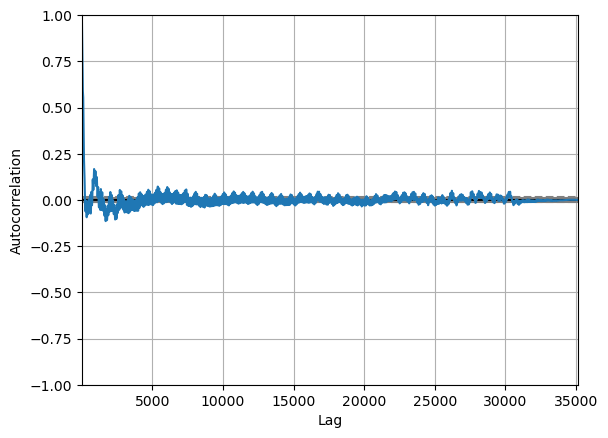

In [16]:
autocorrelation_plot(df_tc[0])

In [ ]:
autocorrelation_plot(our_total)

## Visualize by day of week

### Shared Dataset

In [19]:
df_shared = pd.read_csv("data/shared_all_records.csv")
df_shared.dropna(inplace=True)
df_shared.reset_index(drop=True, inplace=True)
df_shared = df_shared.iloc[:, [0, 2, 1]]
df_shared

,Time,Location,Energy
0,2020-10-06 00:15:00,PT41CV,0.076
1,2020-10-06 00:30:00,PT41CV,0.072
2,2020-10-06 00:45:00,PT41CV,0.072
3,2020-10-06 01:00:00,PT41CV,0.068
4,2020-10-06 01:15:00,PT41CV,0.032
...,...,...,...
576694,2022-11-25 00:00:00,PT87ZW,0.764
576695,2022-11-25 00:15:00,PT87ZW,0.660
576696,2022-11-25 00:30:00,PT87ZW,0.692
576697,2022-11-25 00:45:00,PT87ZW,0.660


In [20]:
df_shared.isna().any()

Time        False
Location    False
Energy      False
dtype: bool

In [21]:
df_shared['Time'] = pd.to_datetime(df_shared['Time'])
df_shared['DayOfWeek'] = df_shared['Time'].dt.dayofweek
df_shared['Weekend'] = df_shared['Time'].dt.dayofweek.isin([5, 6]).astype(int)
df_shared['Hour'] = df_shared['Time'].dt.hour
df_shared['Month'] = df_shared['Time'].dt.month
df_shared

,Time,Location,Energy,DayOfWeek,Weekend,Hour,Month
0,2020-10-06 00:15:00,PT41CV,0.076,1,0,0,10
1,2020-10-06 00:30:00,PT41CV,0.072,1,0,0,10
2,2020-10-06 00:45:00,PT41CV,0.072,1,0,0,10
3,2020-10-06 01:00:00,PT41CV,0.068,1,0,1,10
4,2020-10-06 01:15:00,PT41CV,0.032,1,0,1,10
...,...,...,...,...,...,...,...
576694,2022-11-25 00:00:00,PT87ZW,0.764,4,0,0,11
576695,2022-11-25 00:15:00,PT87ZW,0.660,4,0,0,11
576696,2022-11-25 00:30:00,PT87ZW,0.692,4,0,0,11
576697,2022-11-25 00:45:00,PT87ZW,0.660,4,0,0,11


In [22]:
df_weekly = df_shared.groupby(['DayOfWeek']).mean()
df_weekly.drop(['Hour', 'Weekend', 'Month'], inplace=True, axis=1)
df_weekly

,Energy
DayOfWeek,
0,0.293819
1,0.293712
2,0.291747
3,0.291434
4,0.276785
5,0.301540
6,0.310821


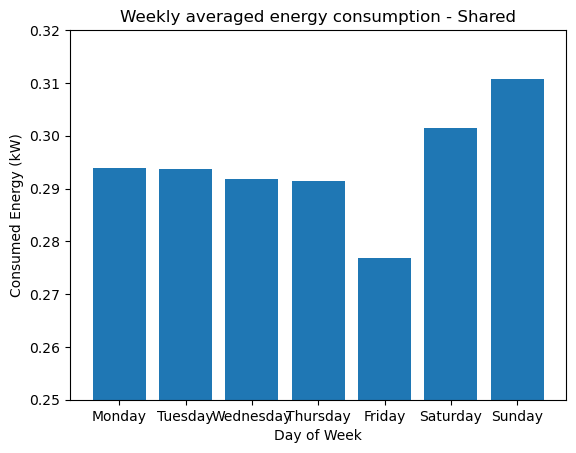

In [27]:
plt.bar(list(calendar.day_name), df_weekly['Energy'])
plt.xlabel("Day of Week")
plt.ylabel("Consumed Energy (kW)")
plt.title("Weekly averaged energy consumption - Shared")
plt.ylim(0.25,0.32)
plt.savefig("images/weekly_consumption_shared.png")
plt.show()

In [28]:
df_hourly = df_shared.groupby(['Hour']).mean()
df_hourly.drop(['DayOfWeek', 'Weekend', 'Month'], inplace=True, axis=1)
df_hourly

,Energy
Hour,
0,0.284523
1,0.228929
2,0.193938
3,0.176036
4,0.170749
5,0.157631
6,0.151664
7,0.177196
8,0.217718


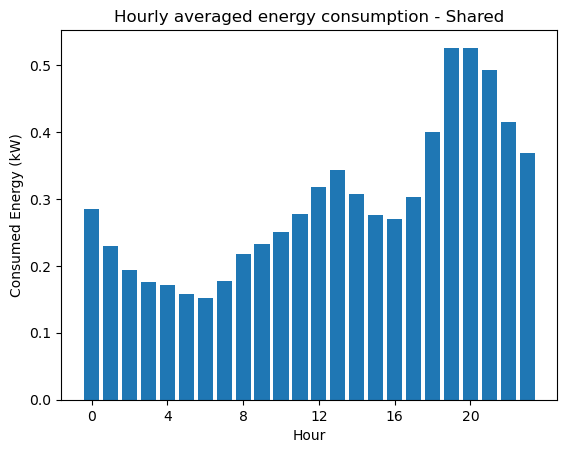

In [29]:
plt.bar(range(len(df_hourly)), df_hourly['Energy'])
plt.xlabel("Hour")
plt.ylabel("Consumed Energy (kW)")
plt.title("Hourly averaged energy consumption - Shared")
plt.xticks(list([0,4,8,12,16,20]))
plt.savefig("images/hourly_consumption_shared.png")
plt.show()

In [30]:
df_monthly = df_shared.groupby(['Month']).sum()
df_monthly.drop(['DayOfWeek', 'Weekend', 'Hour'], inplace=True, axis=1)
df_monthly

,Energy
Month,
1,18486.664
2,15911.936
3,13316.788
4,11623.200
5,11417.620
6,10567.528
7,12153.500
8,11706.436
9,12688.348


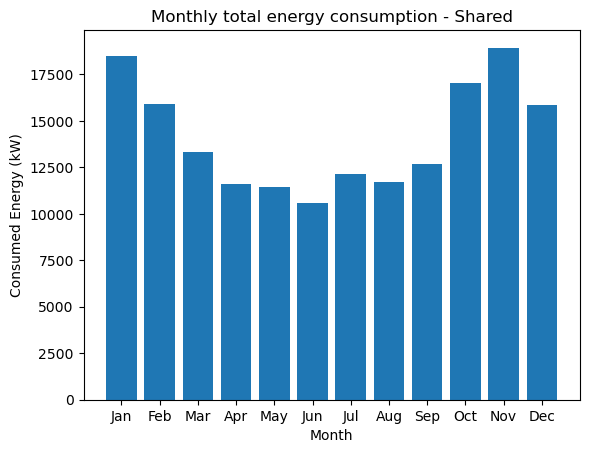

In [31]:
plt.bar(list(calendar.month_abbr[1:]), df_monthly['Energy'])
plt.xlabel("Month")
plt.ylabel("Consumed Energy (kW)")
plt.title("Monthly total energy consumption - Shared")
#plt.grid(True)
plt.savefig("images/monthly_consumption_shared.png")
plt.show()

#### Meteorology comparison

In [57]:
shared_meteo = pd.read_csv("data/shared_meteo.csv")
shared_meteo

,Time,Location,Temp_Med,Temp_Max,Temp_Min,Rumo_Vento_Med,Rumo_Vento_Max,Intensidade_Vento_Med,Intensidade_Vento_Max,Precip,Energy
0,2020-10-06 00:15:00,PT41CV,11.10,11.20,11.00,285.0,287.0,3.10,4.40,0.00,0.076
1,2020-10-06 00:30:00,PT41CV,11.00,11.15,10.85,295.5,298.5,2.85,3.85,0.00,0.072
2,2020-10-06 00:45:00,PT41CV,11.30,11.50,11.00,260.0,276.0,2.00,3.00,0.00,0.072
3,2020-10-06 01:00:00,PT41CV,11.45,11.60,11.20,196.0,211.0,1.70,2.55,0.00,0.068
4,2020-10-06 01:15:00,PT41CV,10.80,11.10,10.60,162.0,191.0,1.30,1.70,0.00,0.032
...,...,...,...,...,...,...,...,...,...,...,...
576694,2022-11-25 00:00:00,PT87ZW,12.65,12.70,12.55,159.0,139.0,2.35,3.65,0.05,0.764
576695,2022-11-25 00:15:00,PT87ZW,12.60,12.70,12.60,160.0,158.0,1.90,3.60,0.00,0.660
576696,2022-11-25 00:30:00,PT87ZW,12.60,12.70,12.50,156.5,153.5,2.20,3.25,0.00,0.692
576697,2022-11-25 00:45:00,PT87ZW,12.60,12.70,12.40,147.0,172.0,2.00,3.30,0.00,0.660


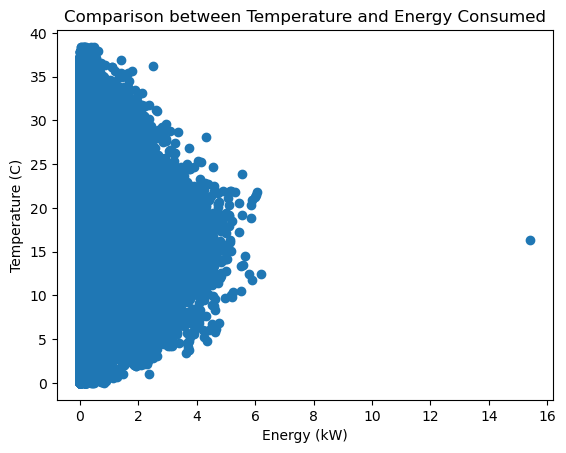

In [70]:
plt.scatter(shared_meteo['Energy'], shared_meteo['Temp_Med'])
plt.xlabel('Energy (kW)') 
plt.ylabel('Temperature (C)')
plt.title('Comparison between Temperature and Energy Consumed')
plt.show()

### Porto Dataset

In [4]:
df_porto = pd.read_csv("../../data/porto.csv", index_col=[0], decimal=',')
df_porto.reset_index(drop=True, inplace=True)
df_porto = df_porto.iloc[:, [0, 2, 1]]
df_porto

,Time,Location,Energy
0,2019-01-01 00:00:00,0,2.964000
1,2019-01-01 00:15:00,0,2.584000
2,2019-01-01 00:30:00,0,3.071000
3,2019-01-01 00:45:00,0,2.694000
4,2019-01-01 01:00:00,0,2.569000
...,...,...,...
1791931,2020-01-01 22:45:00,50,0.753222
1791932,2020-01-01 23:00:00,50,0.716855
1791933,2020-01-01 23:15:00,50,0.735802
1791934,2020-01-01 23:30:00,50,0.485237


In [5]:
df_porto.isna().sum()

Time        0
Location    0
Energy      0
dtype: int64

In [6]:
df_porto['Time'] = pd.to_datetime(df_porto['Time'])
df_porto['DayOfWeek'] = df_porto['Time'].dt.dayofweek
df_porto['Weekend'] = df_porto['Time'].dt.dayofweek.isin([5, 6]).astype(int)
df_porto['Hour'] = df_porto['Time'].dt.hour
df_porto['Month'] = df_porto['Time'].dt.month
df_porto

,Time,Location,Energy,DayOfWeek,Weekend,Hour,Month
0,2019-01-01 00:00:00,0,2.964000,1,0,0,1
1,2019-01-01 00:15:00,0,2.584000,1,0,0,1
2,2019-01-01 00:30:00,0,3.071000,1,0,0,1
3,2019-01-01 00:45:00,0,2.694000,1,0,0,1
4,2019-01-01 01:00:00,0,2.569000,1,0,1,1
...,...,...,...,...,...,...,...
1791931,2020-01-01 22:45:00,50,0.753222,2,0,22,1
1791932,2020-01-01 23:00:00,50,0.716855,2,0,23,1
1791933,2020-01-01 23:15:00,50,0.735802,2,0,23,1
1791934,2020-01-01 23:30:00,50,0.485237,2,0,23,1


In [7]:
df_weekly_porto = df_porto.groupby(['DayOfWeek']).mean()
df_weekly_porto.drop(['Location', 'Hour', 'Weekend', 'Month'], inplace=True, axis=1)
df_weekly_porto

,Energy
DayOfWeek,
0,0.764698
1,0.736422
2,0.775358
3,0.760662
4,0.788554
5,0.738582
6,0.779934


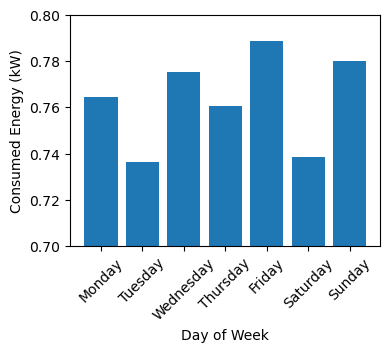

In [9]:
plt.figure(figsize=(4,3))
plt.bar(list(calendar.day_name), df_weekly_porto['Energy'])
plt.xlabel("Day of Week")
plt.ylabel("Consumed Energy (kW)")
#plt.title("Weekly averaged energy consumption - Porto")
plt.ylim(0.7,0.8)
plt.xticks(rotation=45)
plt.savefig("../../images/weekly/weekly_consumption_porto.png")
plt.show()

In [11]:
df_hourly_porto = df_porto.groupby(['Hour']).mean()
df_hourly_porto.drop(['Location', 'DayOfWeek', 'Weekend', 'Month'], inplace=True, axis=1)
df_hourly_porto

,Energy
Hour,
0,0.716717
1,0.663583
2,0.643213
3,0.635617
4,0.603679
5,0.542506
6,0.566129
7,0.654651
8,0.767562


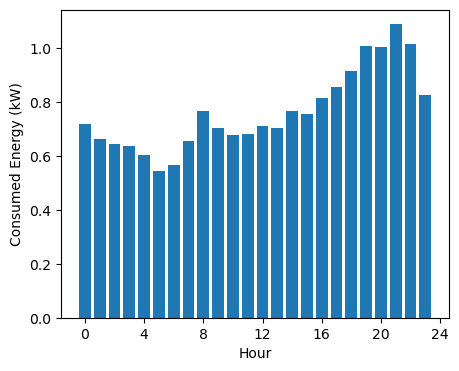

In [13]:
plt.figure(figsize=(5,4))
plt.bar(range(len(df_hourly_porto)), df_hourly_porto['Energy'])
plt.xlabel("Hour")
plt.ylabel("Consumed Energy (kW)")
#plt.title("Hourly averaged energy consumption - Porto")
plt.xticks(list([0,4,8,12,16,20,24]))
plt.savefig("../../images/hourly/hourly_consumption_porto.png")
plt.show()

In [14]:
df_monthly_porto = df_porto.groupby(['Month']).sum()
df_monthly_porto.drop(['Location','DayOfWeek', 'Weekend', 'Hour'], inplace=True, axis=1)
df_monthly_porto

,Energy
Month,
1,149464.988154
2,119607.056088
3,126842.465440
4,103826.394743
5,103761.874211
6,91686.346490
7,86488.008611
8,79870.297619
9,104485.154526


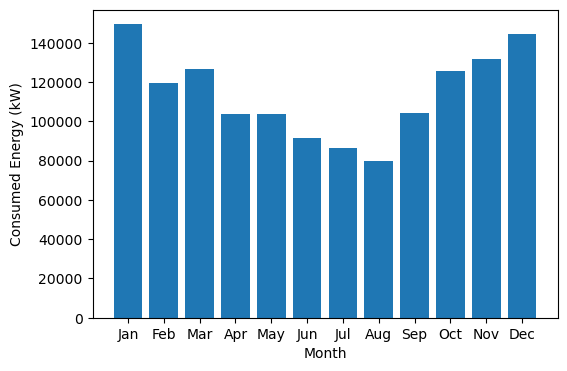

In [17]:
plt.figure(figsize=(6,4))
plt.bar(list(calendar.month_abbr[1:]), df_monthly_porto['Energy'])
plt.xlabel("Month")
plt.ylabel("Consumed Energy (kW)")
#plt.title("Monthly total energy consumption - Porto")
#plt.grid(True)
plt.savefig("../../images/monthly/monthly_consumption_porto.png")
plt.show()

### Coopernico Dataset

In [42]:
df_coop = pd.read_csv("data/coopernico_50houses_location.csv")
df_coop.reset_index(drop=True, inplace=True)
df_coop = df_coop.iloc[:, [0, 2, 1]]
df_coop

,Time,Location,Energy
0,2021-11-01 00:15:00,PT84ZD,0.144
1,2021-11-01 00:30:00,PT84ZD,0.144
2,2021-11-01 00:45:00,PT84ZD,0.144
3,2021-11-01 01:00:00,PT84ZD,0.144
4,2021-11-01 01:15:00,PT84ZD,0.028
...,...,...,...
1138131,2023-02-28 23:00:00,PT37FP,0.000
1138132,2023-02-28 23:15:00,PT37FP,1.000
1138133,2023-02-28 23:30:00,PT37FP,0.000
1138134,2023-02-28 23:45:00,PT37FP,1.000


In [43]:
df_coop.isna().sum()

Time        0
Location    0
Energy      0
dtype: int64

In [44]:
df_coop['Time'] = pd.to_datetime(df_coop['Time'])
df_coop['DayOfWeek'] = df_coop['Time'].dt.dayofweek
df_coop['Weekend'] = df_coop['Time'].dt.dayofweek.isin([5, 6]).astype(int)
df_coop['Hour'] = df_coop['Time'].dt.hour
df_coop['Month'] = df_coop['Time'].dt.month
df_coop

,Time,Location,Energy,DayOfWeek,Weekend,Hour,Month
0,2021-11-01 00:15:00,PT84ZD,0.144,0,0,0,11
1,2021-11-01 00:30:00,PT84ZD,0.144,0,0,0,11
2,2021-11-01 00:45:00,PT84ZD,0.144,0,0,0,11
3,2021-11-01 01:00:00,PT84ZD,0.144,0,0,1,11
4,2021-11-01 01:15:00,PT84ZD,0.028,0,0,1,11
...,...,...,...,...,...,...,...
1138131,2023-02-28 23:00:00,PT37FP,0.000,1,0,23,2
1138132,2023-02-28 23:15:00,PT37FP,1.000,1,0,23,2
1138133,2023-02-28 23:30:00,PT37FP,0.000,1,0,23,2
1138134,2023-02-28 23:45:00,PT37FP,1.000,1,0,23,2


In [47]:
df_weekly_coop = df_coop.groupby(['DayOfWeek']).mean()
df_weekly_coop.drop(['Hour', 'Weekend', 'Month'], inplace=True, axis=1)
df_weekly_coop

,Energy
DayOfWeek,
0,9.253089
1,9.630096
2,9.604831
3,9.658160
4,9.698046
5,8.951156
6,8.168936


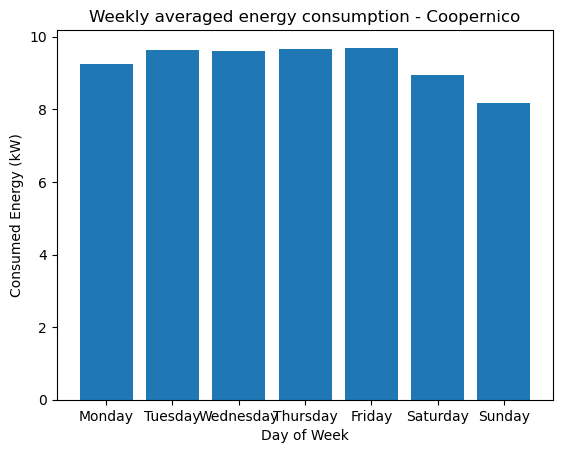

In [49]:
plt.bar(list(calendar.day_name), df_weekly_coop['Energy'])
plt.xlabel("Day of Week")
plt.ylabel("Consumed Energy (kW)")
plt.title("Weekly averaged energy consumption - Coopernico")
plt.savefig("images/weekly_consumption_coopernico.png")
plt.show()

In [51]:
df_hourly_coop = df_coop.groupby(['Hour']).mean()
df_hourly_coop.drop(['DayOfWeek', 'Weekend', 'Month'], inplace=True, axis=1)
df_hourly_coop

,Energy
Hour,
0,8.186077
1,8.087390
2,6.817196
3,5.519582
4,5.073802
5,6.126567
6,7.349121
7,8.490350
8,9.081275


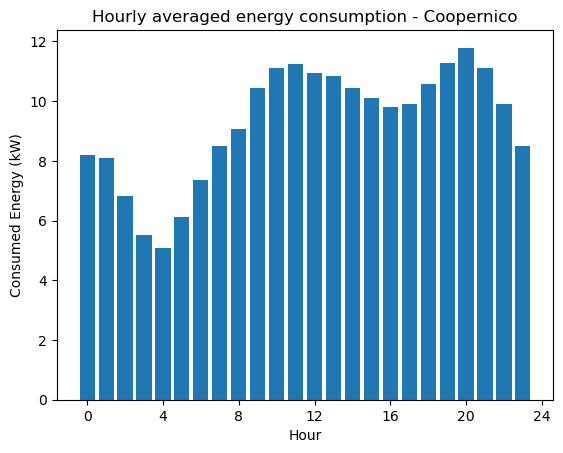

In [52]:
plt.bar(range(len(df_hourly_coop)), df_hourly_coop['Energy'])
plt.xlabel("Hour")
plt.ylabel("Consumed Energy (kW)")
plt.title("Hourly averaged energy consumption - Coopernico")
plt.xticks(list([0,4,8,12,16,20,24]))
plt.savefig("images/hourly_consumption_coop.png")
plt.show()

In [54]:
df_monthly_coop = df_coop.groupby(['Month']).sum()
df_monthly_coop.drop(['DayOfWeek', 'Weekend', 'Hour'], inplace=True, axis=1)
df_monthly_coop

,Energy
Month,
1,1231870.724
2,1148208.124
3,677845.576
4,635140.864
5,756080.532
6,715729.304
7,844753.648
8,747803.608
9,668408.260


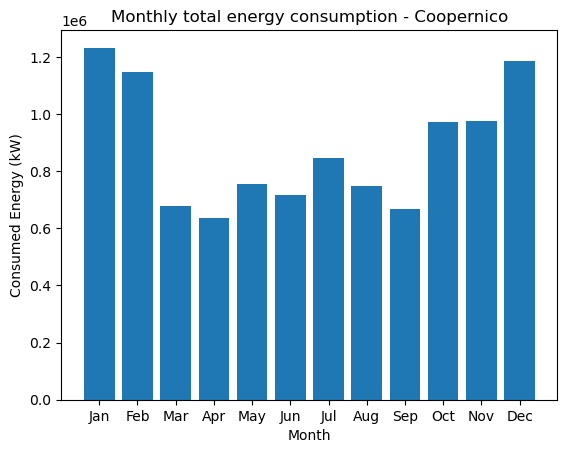

In [55]:
plt.bar(list(calendar.month_abbr[1:]), df_monthly_coop['Energy'])
plt.xlabel("Month")
plt.ylabel("Consumed Energy (kW)")
plt.title("Monthly total energy consumption - Coopernico")
#plt.grid(True)
plt.savefig("images/monthly_consumption_coop.png")
plt.show()